In [1]:
import pandas as pd
import numpy as np
import json 
import math
import collections
import seaborn as sns
import networkx as nx
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv(f'../data/connected.csv',index_col=0)
df

,index,position,name,city,menu,link,score,N_reviews,price,Name,...,latitude,longitude,cuisines,meals,specialDiets,positionlink,province,Link,provinceOK,longitud§e
0,0,2018,Osteria al Borgo,Lucca,False,/Restaurant_Review-g187898-d23137800-Reviews-O...,5.0,6,NaN,Osteria al Borgo,...,43.851808,10.506207,"Pizza, Tuscan, Central-Italian",NaN,"Vegetarian Friendly, Vegan Options, Gluten Fre...",j39_https://maps.google.com/maps?saddr=&daddr=...,pisa,/Restaurant_Review-g187898-d23137800-Reviews-O...,0,10.495633
1,12,1309,Il Genio Italiano,Florence,True,/Restaurant_Review-g187895-d2483611-Reviews-Il...,4.0,229,2.5,Il Genio Italiano,...,43.798058,11.219482,"Italian, Pizza, Mediterranean, Tuscan, Central...",NaN,Vegetarian Friendly,vs1_https://maps.google.com/maps?saddr=&daddr=...,florence,/Restaurant_Review-g187895-d2483611-Reviews-Il...,1,NaN
2,37,1316,La Taverna,Scandicci,False,/Restaurant_Review-g644284-d2660933-Reviews-La...,4.0,236,2.5,La Taverna,...,43.764280,11.180183,"Italian, Pizza, Seafood, Mediterranean",NaN,Vegetarian Friendly,zhJ_https://maps.google.com/maps?saddr=&daddr=...,florence,/Restaurant_Review-g644284-d2660933-Reviews-La...,1,NaN
3,48,1301,Bar Pasticceria Deanna,Florence,False,/Restaurant_Review-g187895-d2077023-Reviews-Ba...,4.0,162,1.0,Bar Pasticceria Deanna,...,43.775550,11.247292,"Italian, Bar, Cafe, Deli",NaN,"Vegetarian Friendly, Vegan Options, Gluten Fre...",hSR_https://maps.google.com/maps?saddr=&daddr=...,florence,/Restaurant_Review-g187895-d2077023-Reviews-Ba...,1,NaN
4,50,1332,Perseus Fiesolano,Fiesole,True,/Restaurant_Review-g187896-d2720609-Reviews-Pe...,3.5,754,2.5,Perseus Fiesolano,...,43.806915,11.293199,"Italian, Mediterranean, Barbecue, Tuscan, Cent...","Lunch, Dinner",Gluten Free Options,d5H_https://maps.google.com/maps?saddr=&daddr=...,florence,/Restaurant_Review-g187896-d2720609-Reviews-Pe...,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14998,11035,1755,Bar di Sotto,Elba Island,False,/Restaurant_Review-g194881-d21296721-Reviews-B...,5.0,1,NaN,Bar di Sotto,...,42.804342,10.308619,"Bar, Cafe, Pub",NaN,NaN,Rxn_https://maps.google.com/maps?saddr=&daddr=...,livorno,NaN,1,NaN
14999,1449,1328,Terrazza,Follonica,False,/Restaurant_Review-g194764-d20989093-Reviews-T...,5.0,1,2.5,Terrazza,...,42.935886,10.721528,"Italian, Tuscan, Central-Italian, Seafood","Breakfast, Lunch, Dinner, Brunch, Drinks",NaN,cpI_https://maps.google.com/maps?saddr=&daddr=...,grosseto,/Restaurant_Review-g194764-d20989093-Reviews-T...,1,NaN
15000,1681,1230,Beach Bar,Follonica,False,/Restaurant_Review-g194764-d20989105-Reviews-B...,5.0,2,2.5,Beach Bar,...,42.934032,10.725251,"Italian, Pizza","Breakfast, Lunch, Dinner, Drinks",NaN,DpJ_https://maps.google.com/maps?saddr=&daddr=...,grosseto,/Restaurant_Review-g194764-d20989105-Reviews-B...,1,NaN
15001,3808,696,Kebab Ali Baba,Massa,False,/Restaurant_Review-g660766-d15862036-Reviews-K...,4.0,2,NaN,Kebab Ali Baba,...,44.035650,10.136610,NaN,"Lunch, Dinner",NaN,oC8_https://maps.google.com/maps?saddr=&daddr=...,massacarrara,/Restaurant_Review-g660766-d15862036-Reviews-K...,1,NaN


In [6]:
with open('../data/communitiesW/multicore.json') as jf:
    multicore = json.load(jf)

In [7]:
centralities = multicore['params']['centralities']

In [20]:
M = max(centralities.values())

for k,v in centralities.items(): 
    centralities[k] = 1 - v/M

In [21]:
def plot_kcentral(df,dictionary,k=10):
    sorted_dictionary =  sorted(dictionary.items(), key=lambda x: x[1],reverse = True)
    nodes, values = zip(*sorted_dictionary)
    nodes = nodes[:k]
    values = values[:k]
    names = [df.loc[int(node)]['name'] for node in nodes]
    
    plt.figure(figsize=(20,5))
    plt.bar(names, values, color=sns.color_palette('ocean',k))
    plt.xticks(rotation=25)

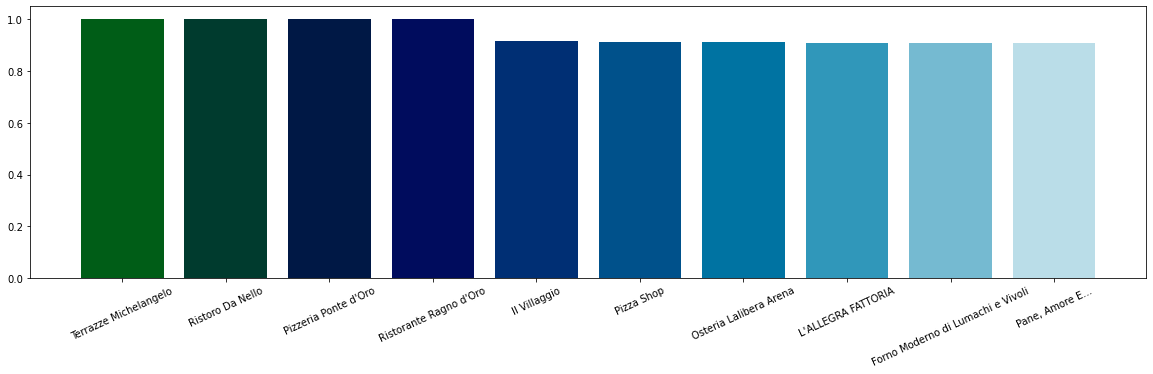

In [22]:
plot_kcentral(df,centralities)